In [1]:
import pandas as pd
housing = pd.read_csv('Housing.csv') #reading csv file

In [2]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.isnull() #returns a matrix specifying null values presence

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
housing.isnull().any().any() #checks whether there is any null values

False

In [14]:
housing.dtypes #types of all features

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type object.
columnsToEncode = list(housing.select_dtypes(include=['object']))
le = LabelEncoder()
for feature in columnsToEncode:
    try:
        housing[feature] = le.fit_transform(housing[feature])
    except:
        print('Error encoding '+feature)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [19]:
housing['no.of.rooms'] = housing['bedrooms'] + housing['bathrooms'] + housing['guestroom'] #adding new column no.of.rooms
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,no.of.rooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,6
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,8
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,6
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,6


In [20]:

import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation

cor = housing.corr()
cor


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,no.of.rooms
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721,0.547901
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445,0.229478
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244,0.834262
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559,0.720981
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672,0.420364
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726,0.041655
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328,0.441066
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831,0.231563
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628,0.055617
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477,0.231374


<Figure size 864x720 with 0 Axes>

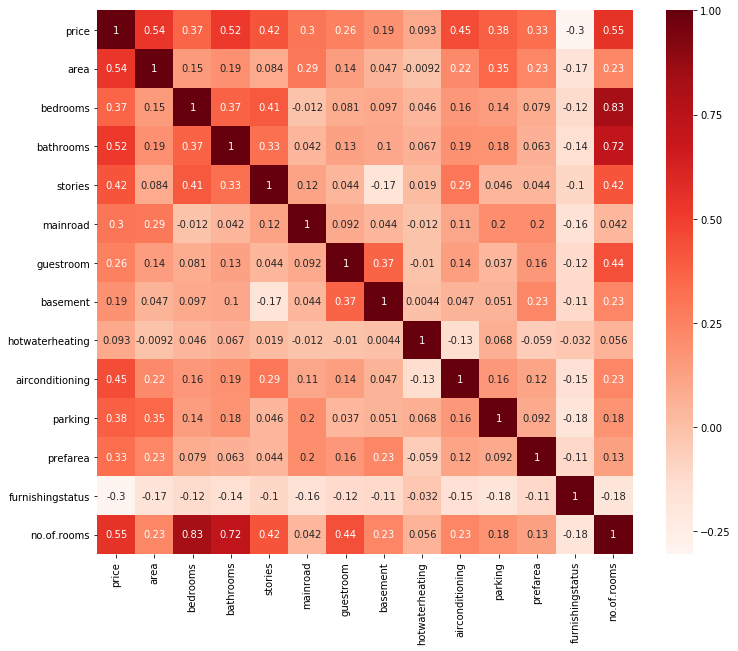

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [23]:
#Correlation with output variable
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

price          1.000000
area           0.535997
bathrooms      0.517545
no.of.rooms    0.547901
Name: price, dtype: float64

In [25]:

#calculating correlation between independent variables
print(housing[["area","bathrooms"]].corr())
print(housing[["bathrooms","no.of.rooms"]].corr())
print(housing[["no.of.rooms","area"]].corr())

              area  bathrooms
area       1.00000    0.19382
bathrooms  0.19382    1.00000
             bathrooms  no.of.rooms
bathrooms     1.000000     0.720981
no.of.rooms   0.720981     1.000000
             no.of.rooms      area
no.of.rooms     1.000000  0.229478
area            0.229478  1.000000


In [26]:
#since bathrooms and no.of.rooms are highly correlated ,we'll drop bathrooms because no.of.rooms has higher correlation with 
#price than bathrooms

#Thus area and no.of.rooms are the features to be selected for predicting house price


In [59]:
#splitting the data into feature and target

feature = housing[['area','no.of.rooms']]
target = housing['price']
print(feature)
print(target)

      area  no.of.rooms
0     7420            6
1     8960            8
2     9960            5
3     7500            6
4     7420            6
5     7500            6
6     8580            7
7    16200            8
8     8100            6
9     5750            6
10   13200            4
11    6000            8
12    6550            6
13    3500            6
14    7800            5
15    6000            5
16    6600            7
17    8500            5
18    4600            6
19    6420            5
20    4320            4
21    7155            6
22    8050            5
23    4560            6
24    8800            5
25    6540            7
26    6000            6
27    8875            4
28    7950            7
29    5500            6
..     ...          ...
515   3210            4
516   3240            4
517   3000            3
518   3500            4
519   4840            3
520   7700            3
521   3635            3
522   2475            4
523   2787            6
524   3264      

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
#splitting dataset into trainiing and testing
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=0)

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(feature_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
#To retrieve the intercept:
print(lr.intercept_)
#For retrieving the slope:
coeff_df = pd.DataFrame(lr.coef_, feature.columns, columns=['Coefficient'])  
coeff_df

-757595.0663588373


,Coefficient
area,399.881493
no.of.rooms,795222.814944


In [63]:
target_pred = lr.predict(feature_test)

In [65]:
df = pd.DataFrame({'Actual': target_test, 'Predicted': target_pred})
df1 = df.head(25)
df1

,Actual,Predicted
239,4585000,4.022822e+06
113,6083000,6.270156e+06
325,4007500,4.602109e+06
66,6930000,6.906509e+06
479,2940000,4.682085e+06
103,6195000,6.552989e+06
386,3535000,3.962840e+06
480,2940000,3.814884e+06
400,3500000,3.032457e+06
37,7980000,7.612675e+06


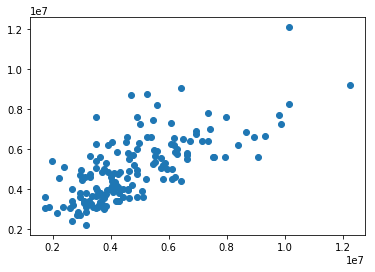

In [66]:
plt.scatter(target_test,target_pred)

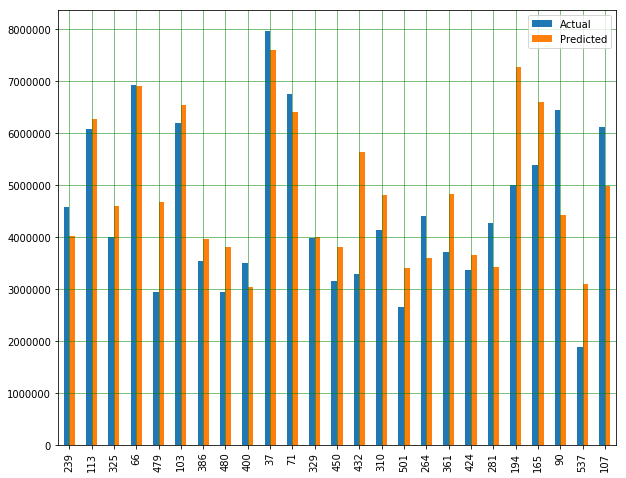

In [67]:
df = pd.DataFrame({'Actual': target_test, 'Predicted': target_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [51]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, target_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(target_test, target_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, target_pred)))

Mean Absolute Error: 998892.2876107609
Mean Squared Error: 1821755959356.119
Root Mean Squared Error: 1349724.4012597976


In [82]:
import statsmodels.formula.api as smf
X = np.column_stack((housing['area'], housing['no.of.rooms']))
y = housing['price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
#since r2 score is low adding few more features

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     248.0
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           3.30e-77
Time:                        20:14:25   Log-Likelihood:                -8466.5
No. Observations:                 545   AIC:                         1.694e+04
Df Residuals:                     542   BIC:                         1.695e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.958e+05   2.48e+05     -1.596      0.1

In [84]:
import statsmodels.formula.api as smf
X = np.column_stack((housing['area'], housing['no.of.rooms'],housing['airconditioning'],housing['stories'],housing['parking'],housing['mainroad'],housing['basement'],housing['hotwaterheating'],housing['prefarea'],housing['furnishingstatus']))
y = housing['price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     102.0
Date:                Sat, 20 Jul 2019   Prob (F-statistic):          5.87e-117
Time:                        20:15:28   Log-Likelihood:                -8352.5
No. Observations:                 545   AIC:                         1.673e+04
Df Residuals:                     534   BIC:                         1.677e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.844e+04   2.58e+05     -0.381      0.7

In [85]:
#since r2 has improved adding those features with p value < 0.05
feature = housing[['area','no.of.rooms','airconditioning','stories','parking','mainroad','basement','hotwaterheating','prefarea','furnishingstatus']]
target = housing['price']

In [86]:
import numpy as np
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=0)

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(feature_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
target_pred = lr.predict(feature_test)

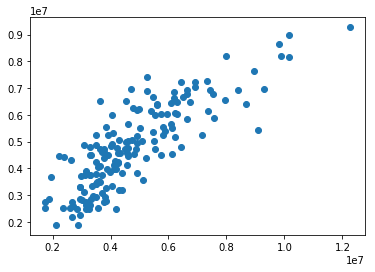

In [89]:
plt.scatter(target_test,target_pred)

In [90]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, target_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(target_test, target_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, target_pred)))

Mean Absolute Error: 783649.7288376375
Mean Squared Error: 1071635265456.4481
Root Mean Squared Error: 1035198.176899693


In [91]:
from sklearn.metrics import explained_variance_score
explained_variance_score(target_test, target_pred)  

0.6912477376723574